In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [3]:
df = pd.read_csv("weatherAUS.csv")

In [21]:
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [23]:
df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [4]:
df['Location'].value_counts()

Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek   

In [6]:
print(df.columns)


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


In [7]:
df.columns = df.columns.str.strip()

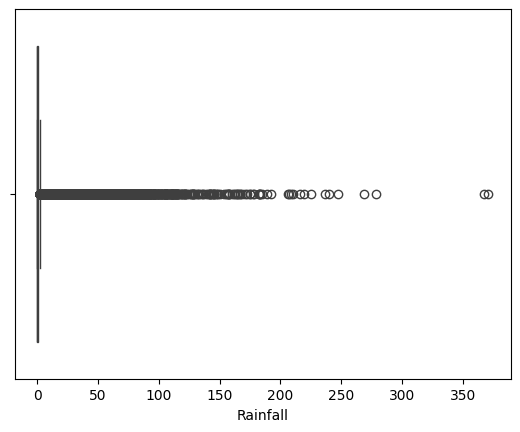

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Rainfall'])
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

# Asegurar que las columnas correctas están seleccionadas
X = df.drop(columns=["Date", "RainTomorrow"])  # Quitamos la fecha y la variable objetivo
y = df["RainTomorrow"]  # Predicción: ¿Lloverá mañana?

# Dividir el dataset en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (113754, 22)
Tamaño del conjunto de prueba: (28439, 22)


In [13]:
from sklearn.preprocessing import LabelEncoder  

# Crear un objeto codificador
encoder = LabelEncoder()

# Codificar las columnas categóricas
categorical_cols = ["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))  # Convertir a string por si hay valores NaN

In [14]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
numerical_cols = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",  
                  "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm",  
                  "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",  
                  "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

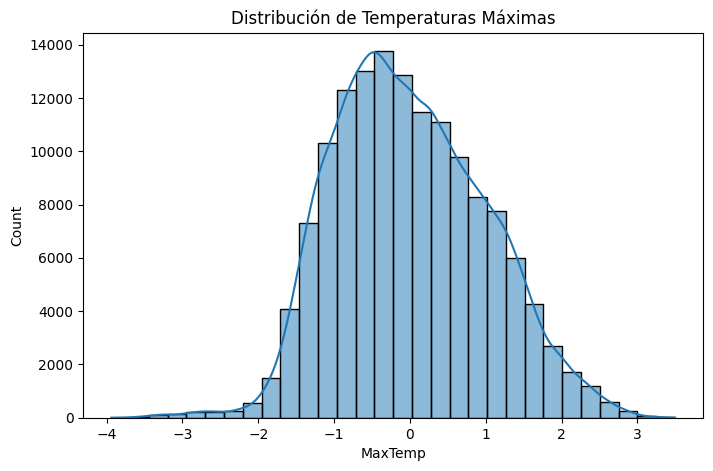

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Gráfico de distribución de la temperatura máxima
plt.figure(figsize=(8,5))
sns.histplot(df['MaxTemp'], bins=30, kde=True)
plt.title('Distribución de Temperaturas Máximas')
plt.show()

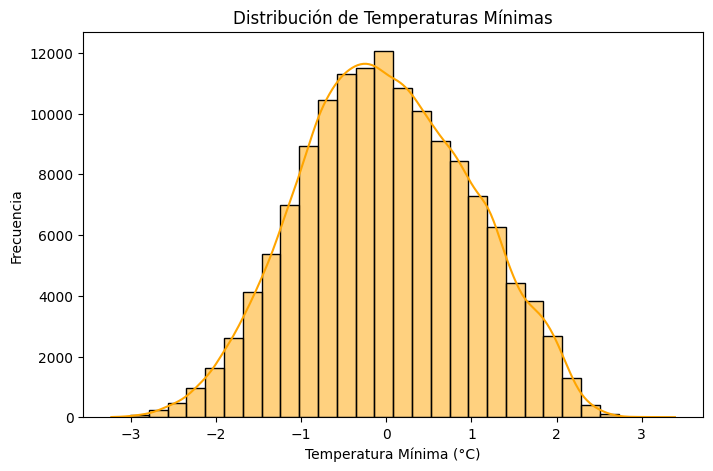

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['MinTemp'], bins=30, kde=True, color='orange')
plt.title('Distribución de Temperaturas Mínimas')
plt.xlabel('Temperatura Mínima (°C)')
plt.ylabel('Frecuencia')
plt.show()

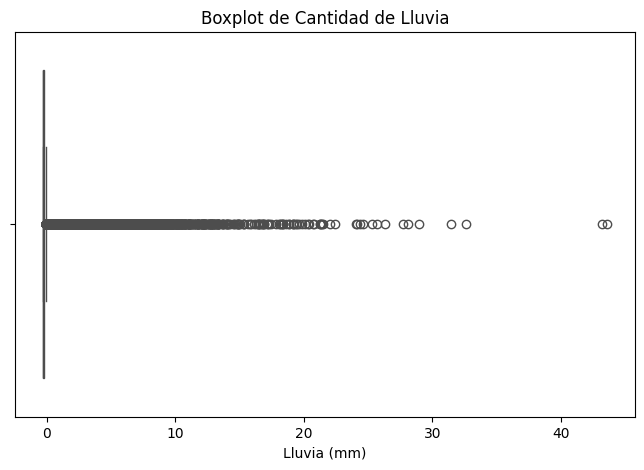

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Rainfall"], color="blue")
plt.title("Boxplot de Cantidad de Lluvia")
plt.xlabel("Lluvia (mm)")
plt.show()

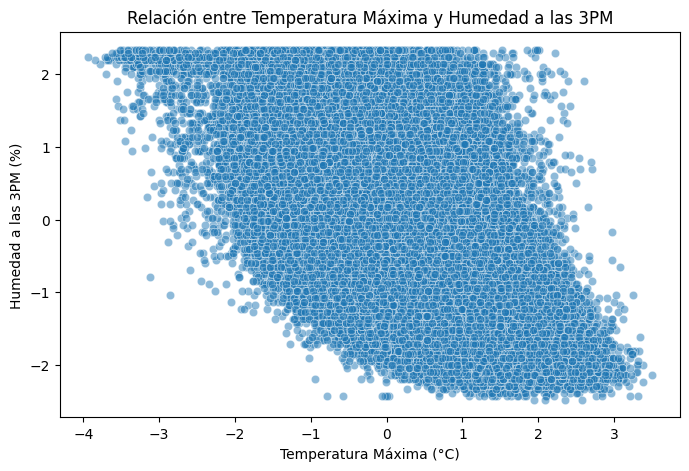

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['MaxTemp'], y=df['Humidity3pm'], alpha=0.5)
plt.title('Relación entre Temperatura Máxima y Humedad a las 3PM')
plt.xlabel('Temperatura Máxima (°C)')
plt.ylabel('Humedad a las 3PM (%)')
plt.show()

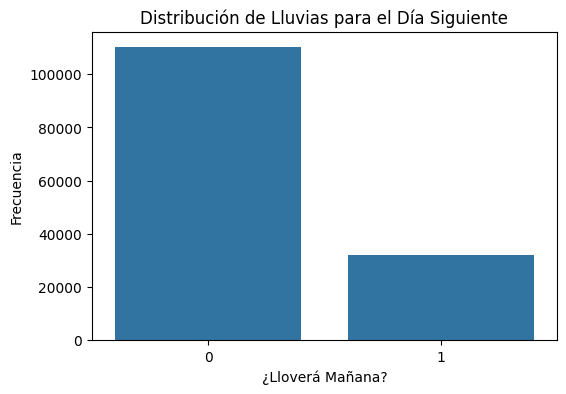

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df["RainTomorrow"])
plt.title("Distribución de Lluvias para el Día Siguiente")
plt.xlabel("¿Lloverá Mañana?")
plt.ylabel("Frecuencia")
plt.show()

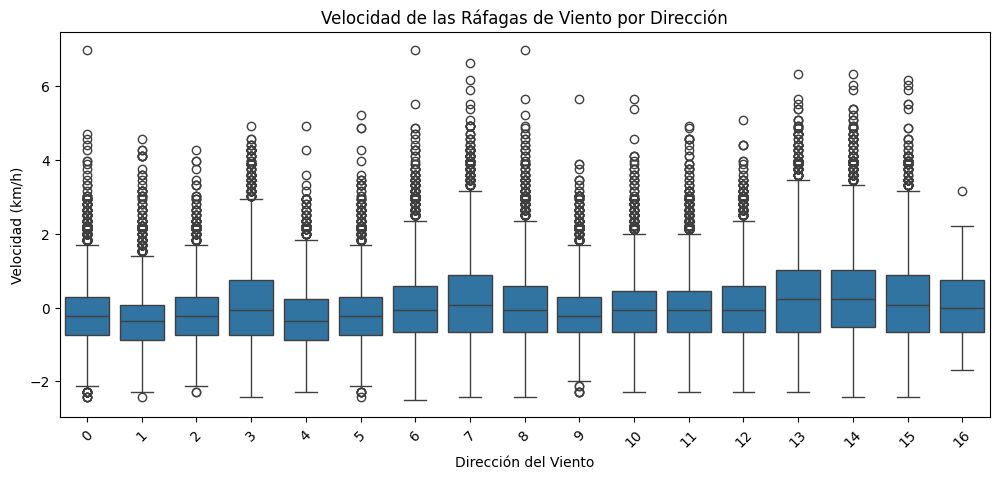

In [26]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df['WindGustDir'], y=df['WindGustSpeed'])
plt.title("Velocidad de las Ráfagas de Viento por Dirección")
plt.xlabel("Dirección del Viento")
plt.ylabel("Velocidad (km/h)")
plt.xticks(rotation=45)
plt.show()

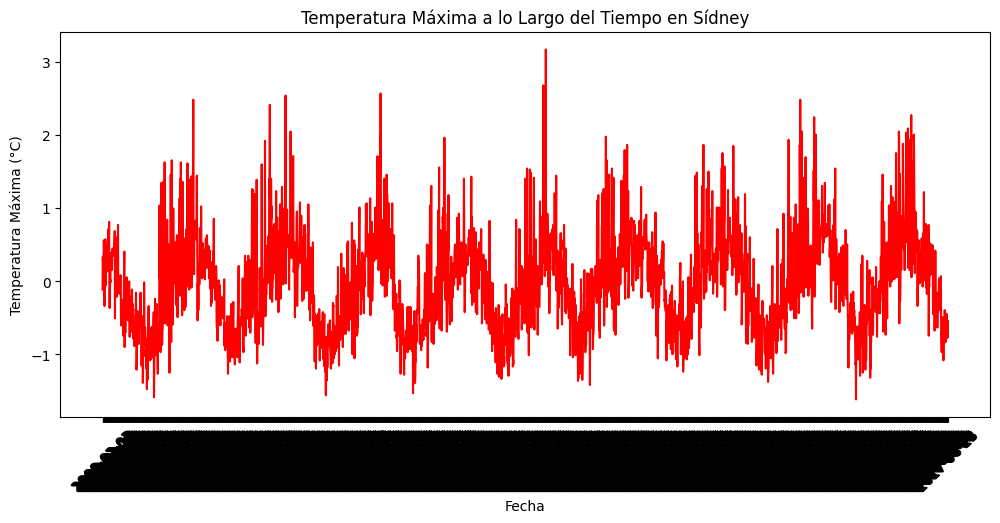

In [25]:
df_city = df[df["Location"] == "Sydney"]  # Cambia por la ciudad que quieras analizar
plt.figure(figsize=(12,5))
plt.plot(df_city["Date"], df_city["MaxTemp"], color="red")
plt.title("Temperatura Máxima a lo Largo del Tiempo en Sídney")
plt.xlabel("Fecha")
plt.ylabel("Temperatura Máxima (°C)")
plt.xticks(rotation=45)
plt.show()

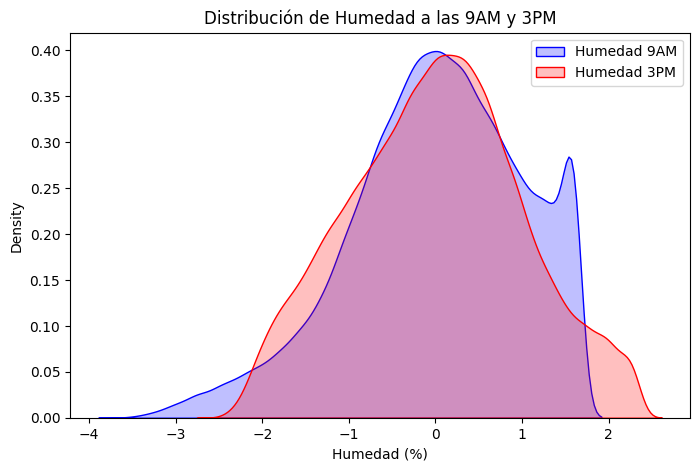

In [29]:
# Este gráfico de densidad te permite ver cómo se distribuyen los niveles de humedad en la mañana y en la tarde.
plt.figure(figsize=(8,5))
sns.kdeplot(df["Humidity9am"], label="Humedad 9AM", fill=True, color="blue")
sns.kdeplot(df["Humidity3pm"], label="Humedad 3PM", fill=True, color="red")
plt.title("Distribución de Humedad a las 9AM y 3PM")
plt.xlabel("Humedad (%)")
plt.legend()
plt.show()

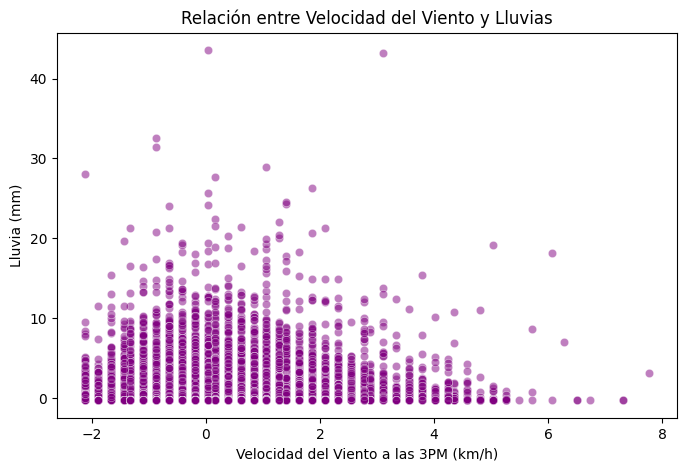

In [30]:
# Muestra si hay una relación entre la velocidad del viento y la cantidad de lluvia registrada.
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["WindSpeed3pm"], y=df["Rainfall"], alpha=0.5, color="purple")
plt.title("Relación entre Velocidad del Viento y Lluvias")
plt.xlabel("Velocidad del Viento a las 3PM (km/h)")
plt.ylabel("Lluvia (mm)")
plt.show()

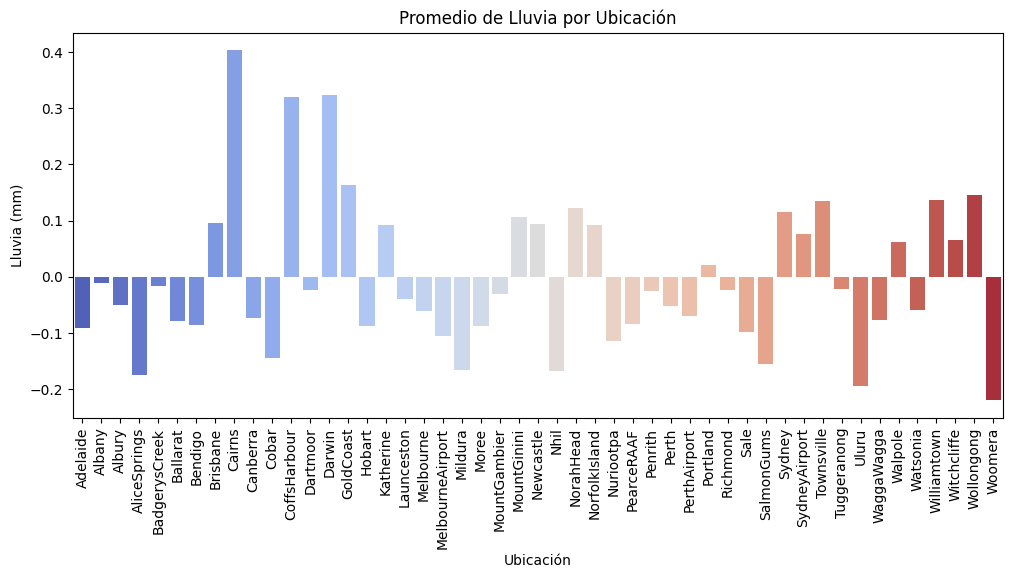

In [32]:
# Permite visualizar en qué ciudades llueve más, en promedio.
plt.figure(figsize=(12,5))
rainfall_avg = df.groupby("Location")["Rainfall"].mean().reset_index()
sns.barplot(data=rainfall_avg, x="Location", y="Rainfall", hue="Location", dodge=False, legend=False, palette="coolwarm")
plt.xticks(rotation=90)  # Rotar los nombres de las ubicaciones para mejor visibilidad
plt.title("Promedio de Lluvia por Ubicación")
plt.ylabel("Lluvia (mm)")
plt.xlabel("Ubicación")
plt.show()

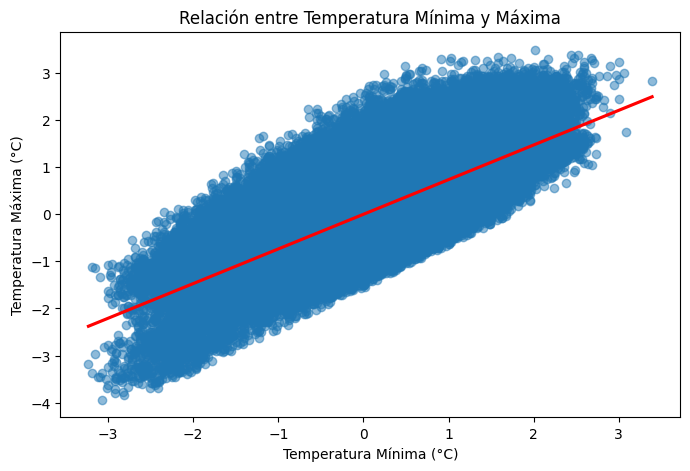

In [33]:
# Nos permite ver si hay una relación lineal entre la temperatura mínima y máxima.
plt.figure(figsize=(8,5))
sns.regplot(x=df["MinTemp"], y=df["MaxTemp"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relación entre Temperatura Mínima y Máxima")
plt.xlabel("Temperatura Mínima (°C)")
plt.ylabel("Temperatura Máxima (°C)")
plt.show()

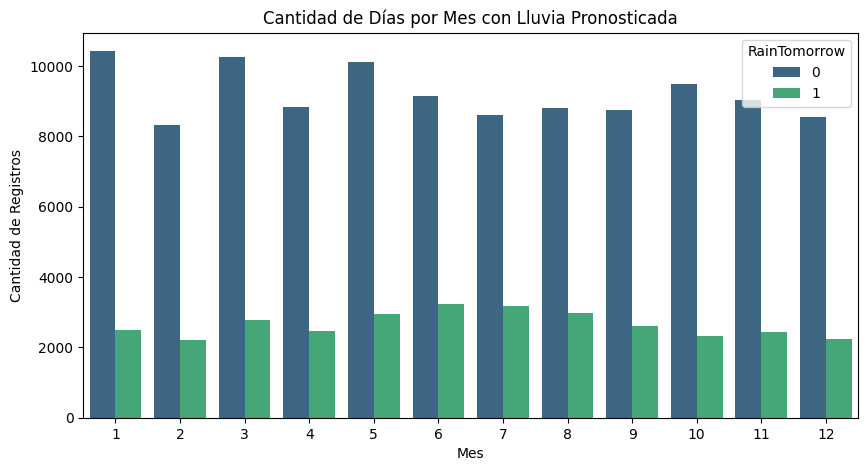

In [35]:
# Nos ayuda a identificar en qué meses llueve más frecuentemente.
# Asegurar que la columna 'Date' sea de tipo datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Extraer el mes de la fecha
df["Month"] = df["Date"].dt.month  

# Graficar la cantidad de registros por mes con el color indicando si lloverá mañana
plt.figure(figsize=(10,5))
sns.countplot(x=df["Month"], hue=df["RainTomorrow"], palette="viridis")
plt.title("Cantidad de Días por Mes con Lluvia Pronosticada")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Registros")
plt.show()

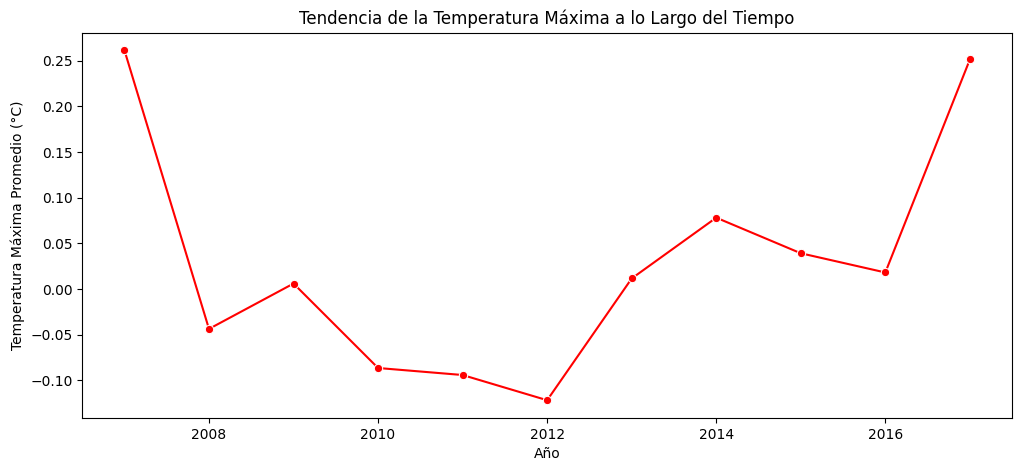

In [36]:
# Permite ver si la temperatura ha ido aumentando o disminuyendo con los años.
df["Year"] = df["Date"].dt.year  # Extraer el año

plt.figure(figsize=(12,5))
sns.lineplot(x=df.groupby("Year")["MaxTemp"].mean().index, y=df.groupby("Year")["MaxTemp"].mean().values, marker="o", color="red")
plt.title("Tendencia de la Temperatura Máxima a lo Largo del Tiempo")
plt.xlabel("Año")
plt.ylabel("Temperatura Máxima Promedio (°C)")
plt.show()